# Transformations

Notebook to apply transformations to data.

In [1]:
import os
print("PYTHONPATH:", os.environ.get('PYTHONPATH'))
print("PATH:", os.environ.get('PATH'))

PYTHONPATH: None
PATH: /Users/koda/.cabal/bin:/Users/koda/.ghcup/bin:/Users/koda/opt/anaconda3/envs/ms_project/bin:/Users/koda/opt/anaconda3/condabin:/Users/koda/anaconda3/bin:/anaconda3/bin:/Users/koda/Library/Python/3.6/bin:/Library/Frameworks/Python.framework/Versions/3.6/bin:/Library/Frameworks/Python.framework/Versions/3.7/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin:/usr/local/share/dotnet:/opt/X11/bin:~/.dotnet/tools:/Library/Apple/usr/bin:/Users/koda/Downloads/platform-tools


In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Read Data
tdc_music_data = np.load("Data/GeneratedData/CleanData_TDC/Music/CGS01_Music_CD/CGS01_Music_CD_20.npy")
tdc_rest_data = np.load("Data/GeneratedData/CleanData_TDC/Rest/CGS01_Rest_CD/CGS01_Rest_CD_20.npy")

idd_music_data = np.load("Data/GeneratedData/CleanData_IDD/Music/NDS001_Music_CD/NDS001_Music_CD_20.npy")
idd_rest_data = np.load("Data/GeneratedData/CleanData_IDD/Rest/NDS001_Rest_CD/NDS001_Rest_CD_20.npy")

np.shape(idd_music_data)

(14, 256)

## Plot Data

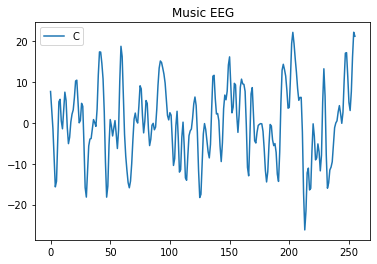

In [4]:
# Plot data
lines = plt.plot(tdc_music_data[0])

plt.legend(lines, "Channel 1")
plt.title("Music EEG")
plt.rcParams['figure.figsize'] = 14, 5
plt.show()

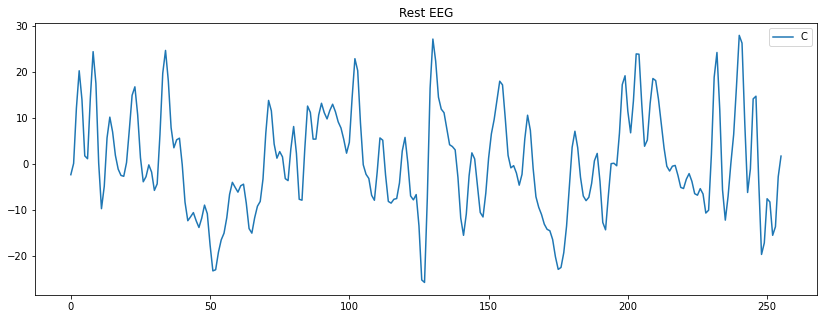

In [5]:
lines = plt.plot(tdc_rest_data[0])

plt.legend(lines, "Channel 1")
plt.title("Rest EEG")
plt.rcParams['figure.figsize'] = 14, 5
plt.show()

## Create Spectrograms

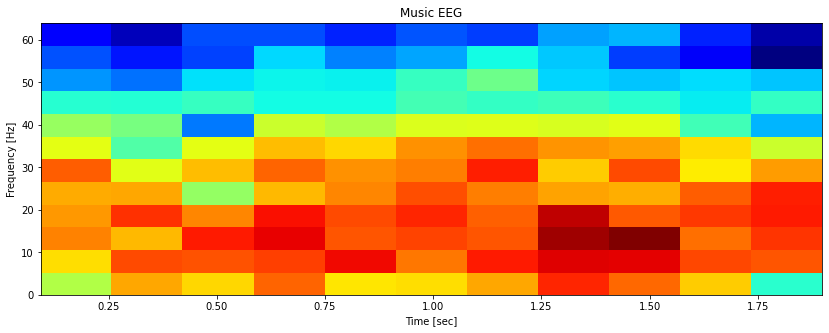

In [6]:
# Create Spectrogram
x = idd_music_data
fs = 128

f, t, Sxx = signal.spectrogram(x, fs, window = signal.tukey(24, .5))
plt.pcolormesh(t, f, np.log10(Sxx[0]))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Music EEG")
plt.set_cmap('jet')    # viridis
plt.rcParams['figure.figsize'] = 14, 5
plt.show()

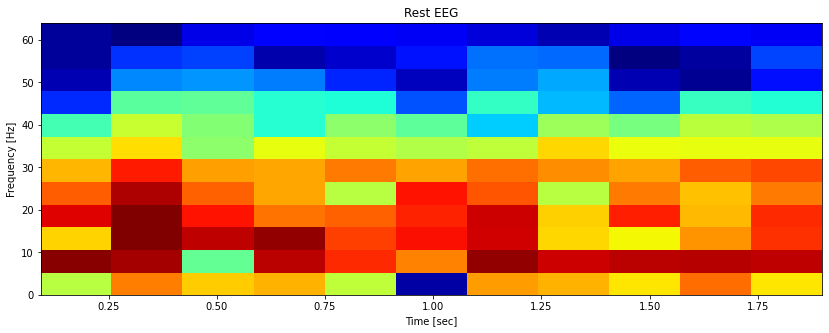

In [7]:
x = idd_rest_data[0]
fs = 128

f, t, Sxx = signal.spectrogram(x, fs, window = signal.tukey(24, .5))
plt.pcolormesh(t, f, np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title("Rest EEG")
plt.set_cmap('jet')    # viridis
plt.rcParams['figure.figsize'] = 14, 5
plt.show()

## Continuous Wavelet Transform

In [24]:
# Scalogram function from Fusion notebook
def scalogram(x, Hz, hz, start_sec, num_secs, w = 5., log = False):
    ''' x = time series
        Hz = sampling rate in Hz of the input signal
        hz = desired sampling rate (by downsampling)
        start_sec = starting second in x
        num_secs = total number of seconds of our clip
        w = width parameter
        log =raw_seiz if true take log of spectrum values
    '''

    downsample = int(round(Hz / hz))
    X = x[start_sec * Hz: (start_sec + num_secs) * Hz : downsample]
    #print('X.shape =', X.shape)plt.rcParams['figure.figsize'] = 10, 5
    #print('N =', N)
    #print('hz =', hz)

    t, dt = np.linspace(start_sec, start_sec + num_secs, hz * num_secs, retstep = True)
    #print('t.shape =', t.shape)
    #print('dt =', dt)fs
    fs = 1 / dt #
    #print('fs =', fs)

    freq = np.linspace(1, fs / 2, int(hz / 2))
    widths = w * fs / (2 * np.pi * freq)
    #print('widths.shape =', widths.shape)

    cwtm = signal.cwt(X,
                      signal.morlet2,
                      widths,
                      w = w)  #,
    #                  dtype = 'complex128')
    print('cwtm.shape =', cwtm.shape)

    plt.rcParams['figure.figsize'] = 14, 5

    if log == False:
        im = plt.pcolormesh(t, freq, np.abs(cwtm), cmap = 'jet') # 'viridis'
    else:
        im = plt.pcolormesh(t, freq, np.log(np.abs(cwtm)), cmap = 'jet')

    plt.show()
    print(cwtm.real[0][0])
    print(cwtm.real.astype("float64")[0][0])
    
    
    return cwtm.real.astype("float64")



Music EEG Scalogram
cwtm.shape = (32, 128)


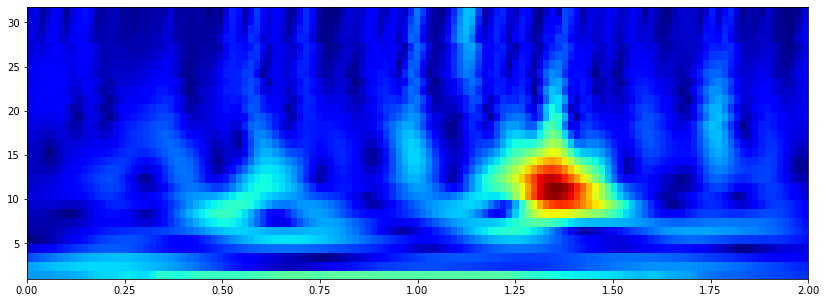

-9.150228473543681
-9.150228473543681
<class 'numpy.float64'>


In [25]:
## Create Scalogram
x = idd_music_data[0]
N = 128  # input signal sampling rate
hz = 64  # downsampled sampling rate
T = 2    # seconds
ts = 0   # starting second
w = 4.

# This time we'll z-transform the time series, and save the mean and std
# so we can apply this same transform to the seizure data.
x_mean, x_std = x.mean(), x.std()
x = (x - x_mean) / x_std

print()
print('Music EEG Scalogram')
idd_music_cwtm = scalogram(idd_music_data[0], N, hz, ts, T, w)  #, True
print(type(idd_music_cwtm[0][0]))


Rest EEG Scalogram
cwtm.shape = (32, 128)


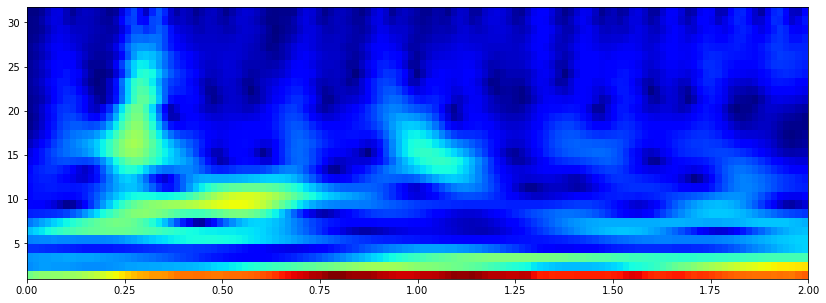

In [11]:
## Create Scalogram
x = idd_rest_data[0]
N = 128  # input signal sampling rate
hz = 64  # downsampled sampling rate
T = 2    # seconds
ts = 0   # starting second
w = 6.

# This time we'll z-transform the time series, and save the mean and std
# so we can apply this same transform to the seizure data.
x_mean, x_std = x.mean(), x.std()
x = (x - x_mean) / x_std

print()
print('Rest EEG Scalogram')
idd_rest_cwtm = scalogram(idd_rest_data[0], N, hz, ts, T, w)  #, True

(64, 128)
t: [0.         0.01574803 0.03149606 0.04724409 0.06299213 0.07874016
 0.09448819 0.11023622 0.12598425 0.14173228 0.15748031 0.17322835
 0.18897638 0.20472441 0.22047244 0.23622047 0.2519685  0.26771654
 0.28346457 0.2992126  0.31496063 0.33070866 0.34645669 0.36220472
 0.37795276 0.39370079 0.40944882 0.42519685 0.44094488 0.45669291
 0.47244094 0.48818898 0.50393701 0.51968504 0.53543307 0.5511811
 0.56692913 0.58267717 0.5984252  0.61417323 0.62992126 0.64566929
 0.66141732 0.67716535 0.69291339 0.70866142 0.72440945 0.74015748
 0.75590551 0.77165354 0.78740157 0.80314961 0.81889764 0.83464567
 0.8503937  0.86614173 0.88188976 0.8976378  0.91338583 0.92913386
 0.94488189 0.96062992 0.97637795 0.99212598 1.00787402 1.02362205
 1.03937008 1.05511811 1.07086614 1.08661417 1.1023622  1.11811024
 1.13385827 1.1496063  1.16535433 1.18110236 1.19685039 1.21259843
 1.22834646 1.24409449 1.25984252 1.27559055 1.29133858 1.30708661
 1.32283465 1.33858268 1.35433071 1.37007874 1.385

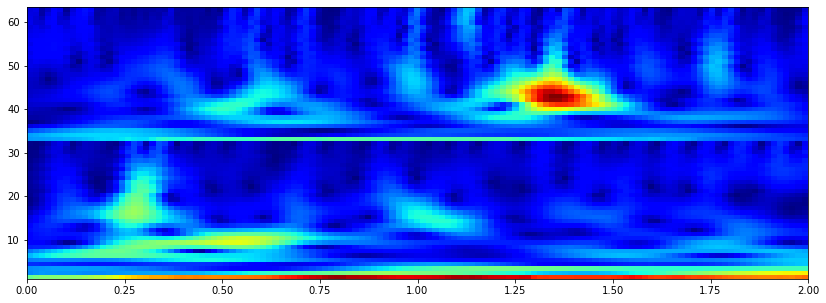

In [14]:
combined = np.concatenate((idd_rest_cwtm, idd_music_cwtm))
# idd_rest_cwtm = scalogram(idd_rest_data[0], N, hz, ts, T, w)  #, True
# def scalogram(x, Hz, hz, start_sec, num_secs, w = 5., log = False):

print(combined.shape)

N = 128  # input signal sampling rate
hz = 64  # downsampled sampling rate
T = 2    # seconds
ts = 0   # starting second
w = 4.

t, dt = np.linspace(ts, ts + T, hz * T, retstep = True)
fs = 1 / dt

freq = np.linspace(1, fs, int(hz))

print("t:", t)
print("freq:", freq)

plt.rcParams['figure.figsize'] = 14, 5
im = plt.pcolormesh(t, freq, np.abs(combined), cmap = 'jet') # 'viridis'

plt.show()

In [13]:
# Scalogram function from Fusion notebook
def scalogram2(x, Hz, hz, start_sec, num_secs, w = 5.):
    ''' x = time series
        Hz = sampling rate in Hz of the input signal
        hz = desired sampling rate (by downsampling)
        start_sec = starting second in x
        num_secs = total number of seconds of our clip
        w = width parameter
        log =raw_seiz if true take log of spectrum values
    '''

    downsample = int(round(Hz / hz))
    X = x[start_sec * Hz: (start_sec + num_secs) * Hz : downsample]

    t, dt = np.linspace(start_sec, start_sec + num_secs, hz * num_secs, retstep = True)
    fs = 1 / dt

    freq = np.linspace(1, fs / 2, int(hz / 2))
    widths = w * fs / (2 * np.pi * freq)

    cwtm = signal.cwt(X,
                      signal.morlet2,
                      widths,
                      w = w)
    
    return cwtm
